In [15]:
import numpy as np
import pandas as pd
import os
import tarfile
from six.moves import urllib
import pickle
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
HOUSING_PATH = os.path.join("datasets", "housing")
pickle_path = os.path.join(HOUSING_PATH, "housing.pickle")
import pandas as pd
def load_housing_data():
    with open(pickle_path, 'rb') as f:
        train_set, test_set = pickle.load(f)
    return train_set, test_set

train_set, test_set = load_housing_data()
print(train_set[0,:])
print(test_set[0,:])

[ -1.42766137e+00   9.72956566e-01   1.85618152e+00  -5.61873949e-01
  -6.00755364e-01  -4.82568002e-01  -5.68998224e-01  -3.57869092e-01
  -5.41151908e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   2.55600000e+05]
[  6.03800653e-01  -7.35924413e-01   8.23226501e-01   7.98679508e-02
   3.15151865e-01  -2.79465781e-01   3.25539234e-01  -3.26707519e-01
   2.33973849e-02   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.55000000e+05]


In [3]:
X_train = train_set[:,:-1]
y_train = train_set[:,-1:]
X_test = test_set[:,:-1]
y_test = test_set[:,-1:]
print(X_train[0,:])
print(y_train[0,:])
print(X_test[0,:])
print(y_test[0,:])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[-1.42766137  0.97295657  1.85618152 -0.56187395 -0.60075536 -0.482568
 -0.56899822 -0.35786909 -0.54115191  0.          0.          0.          1.
  0.        ]
[ 255600.]
[ 0.60380065 -0.73592441  0.8232265   0.07986795  0.31515186 -0.27946578
  0.32553923 -0.32670752  0.02339738  1.          0.          0.          0.
  0.        ]
[ 355000.]
(16512, 14)
(4128, 14)
(16512, 1)
(4128, 1)


In [5]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1, solver="cholesky", max_iter=1000)
lasso_reg = Lasso(alpha=0.1, max_iter=1000)
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=1000)
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

print("training the linear model")
linear_scores = cross_val_score(linear_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print("done training the linear model -> starting the poly model")
ploy_scores = cross_val_score(linear_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=10)
print("done training the poly model -> starting ridge model")
ridge_scores = cross_val_score(linear_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=10)
print("done training the ridge model -> starting lasso model")
lasso_scores = cross_val_score(lasso_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=10)
print("done training the lasso model -> startiong elastic net model")
elastic_net_scores = cross_val_score(elastic_net_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=10)
print("done training the elastic net model -> starting decission tree model")
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print("done training the decission tree model -> starting random forest model")
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print("done training the random forest tree model\n")

target_range = y_train.max()-y_train.min();
linear_average_RMSE = np.sqrt(-linear_scores).mean()/target_range;
ploy_average_RMSE = np.sqrt(-ploy_scores).mean()/target_range;
ridge_average_RMSE = np.sqrt(-ridge_scores).mean()/target_range;
lasso_average_RMSE = np.sqrt(-lasso_scores).mean()/target_range;
elastic_net_average_RMSE = np.sqrt(-elastic_net_scores).mean()/target_range;
tree_average_RMSE = np.sqrt(-tree_scores).mean()/target_range;
forest_average_RMSE = np.sqrt(-forest_scores).mean()/target_range;

training the linear model
done training the linear model -> starting the poly model
done training the poly model -> starting ridge model
done training the ridge model -> starting lasso model


/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/linear_model/coordin

done training the lasso model -> startiong elastic net model


/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/linear_model/coordin

done training the elastic net model -> starting decission tree model
done training the decission tree model -> starting random forest model


/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/w1082952/anaconda/envs/CSIS452/lib/python3.6/site-pack

done training the random forest tree model



['14.19%', '645973022.76%', '645973022.76%', '15.35%', '14.15%', '14.17%', '10.61%']


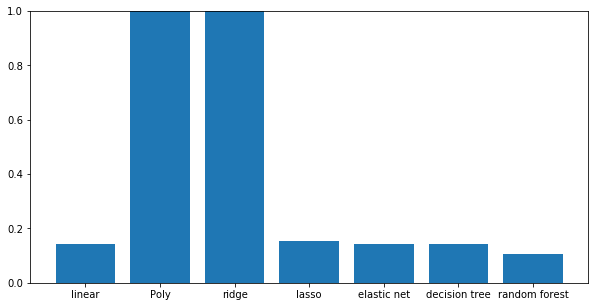

In [7]:
x = [1, 2, 3, 4, 5, 6, 7]
model_names = ["linear", "Poly", "ridge", "lasso", "elastic net", "decision tree", "random forest"]
average_RMSEs = np.array([linear_average_RMSE, ploy_average_RMSE, ridge_average_RMSE, lasso_average_RMSE, elastic_net_average_RMSE, tree_average_RMSE, forest_average_RMSE])
print(['{:.2%}'.format(item) for item in average_RMSEs])
plt.figure(figsize=(10,5))
plt.bar(x, average_RMSEs)
plt.xticks(x, model_names)
plt.ylim(ymax=1)
plt.show()

In [13]:
param_grid = [
    {'bootstrap': [False], 'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,scoring='neg_mean_squared_error')
grid_search.fit(X_train, np.squeeze(y_train))
print(grid_search.best_params_)

{'bootstrap': False, 'max_features': 6, 'n_estimators': 30}


In [23]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_normalized_rmse = final_rmse/target_range
print("RMSE: {0:.0f}".format(final_rmse))
print("RMSE: {0:.2%}".format(final_normalized_rmse))

RMSE: 48286
RMSE: 9.96%
